# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Data Exploration

In [10]:
df = pd.read_csv("ChampionMatchStats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   championName                    4960 non-null   object
 1   assists                         4960 non-null   int64 
 2   baronKills                      4960 non-null   int64 
 3   bountyLevel                     4960 non-null   int64 
 4   consumablesPurchased            4960 non-null   int64 
 5   damageDealtToBuildings          4960 non-null   int64 
 6   damageDealtToObjectives         4960 non-null   int64 
 7   damageDealtToTurrets            4960 non-null   int64 
 8   damageSelfMitigated             4960 non-null   int64 
 9   deaths                          4960 non-null   int64 
 10  detectorWardsPlaced             4960 non-null   int64 
 11  doubleKills                     4960 non-null   int64 
 12  dragonKills                     4960 non-null   

In [11]:
duplicates_mask = df.duplicated(keep=False)

# Count the number of true duplicates
num_duplicates = duplicates_mask.sum()
print(f"Number of true duplicates: {num_duplicates}")

# Display the duplicate rows
print("Duplicate rows:")
print(df[duplicates_mask])

# Get the row numbers of the duplicates
row_numbers = np.where(duplicates_mask)[0]
print(f"Row numbers of duplicate rows: {row_numbers}")

Number of true duplicates: 260
Duplicate rows:
     championName  assists  baronKills  bountyLevel  consumablesPurchased  \
450         Fiora        5           0            1                     4   
451       Belveth       11           1            9                     3   
452         Annie       14           0            0                     4   
453       Karthus       12           0            3                     2   
454       Alistar       21           0            0                    10   
...           ...      ...         ...          ...                   ...   
4105       Maokai       12           0            1                     7   
4106       LeeSin       11           1            2                     8   
4107   Cassiopeia        4           0            0                     2   
4108       Lucian        5           0            2                     5   
4109        Rakan       23           0            0                    12   

      damageDealtToBuildings

In [12]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [13]:
target = 'win'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


Inference: The Datset consists of 80 features & 4830 samples.


In [14]:
df.nunique().sort_values()

unrealKills                       1
sightWardsBoughtInGame            1
nexusTakedowns                    2
teamEarlySurrendered              2
nexusLost                         2
                               ... 
totalDamageDealtToChampions    4477
totalDamageTaken               4505
physicalDamageDealt            4652
totalDamageDealt               4756
perks                          4830
Length: 80, dtype: int64

In [15]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 47 numerical & 32 categorical features.


In [16]:
display(df.describe())

,assists,baronKills,bountyLevel,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,detectorWardsPlaced,...,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,...,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.0,4830.000000,4830.000000,4830.000000,4830.000000
mean,10.908282,0.066874,0.951967,3.504762,2136.456522,7718.303727,2136.456522,17426.836232,5.954037,1.742236,...,1038.657350,1092.316356,0.804348,1.693789,4.168737,0.0,20.100414,2.010559,2.635404,8.340580
std,9.476288,0.267444,1.911960,3.314951,2684.405498,11033.546068,2684.405498,16634.508188,3.734339,2.502270,...,1692.803941,1342.612491,1.181071,1.793208,3.295908,0.0,21.552713,2.813689,3.218647,10.194838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,1.000000,247.000000,940.000000,247.000000,7300.500000,3.000000,0.000000,...,64.000000,301.000000,0.000000,0.000000,2.000000,0.0,3.000000,0.000000,0.000000,1.000000
50%,8.000000,0.000000,0.000000,3.000000,1183.500000,3030.500000,1183.500000,12373.000000,6.000000,1.000000,...,521.000000,660.500000,0.000000,1.000000,4.000000,0.0,15.000000,1.000000,2.000000,6.000000
75%,16.000000,0.000000,1.000000,5.000000,3007.750000,9684.250000,3007.750000,21627.000000,8.000000,3.000000,...,1224.750000,1355.000000,1.000000,3.000000,7.000000,0.0,27.000000,3.000000,4.000000,10.000000
max,65.000000,2.000000,16.000000,25.000000,21896.000000,94556.000000,21896.000000,203932.000000,25.000000,20.000000,...,18412.000000,16272.000000,9.000000,10.000000,11.000000,0.0,161.000000,23.000000,35.000000,89.000000


# EDA

# Section 1: General Statistics and Distribution Analysis

1.1 Overview:

Explore the basic statistics of the dataset, such as mean, median, minimum, maximum, and standard deviation.
Visualize the distribution of certain features using histograms, box plots, or density plots.

In [17]:
# Use 'include' parameter to also see statistics of categorical data
overview = df.describe(include='all')

# Display the statistics of specific columns, e.g. 'kills', 'goldEarned'
specific_stats = df[['kills', 'goldEarned']].agg([np.mean, np.median, np.min, np.max, np.std])

# Display the overview and specific stats
print("Overview statistics:")
print(overview)
print("\nSpecific statistics:")
print(specific_stats)

Overview statistics:
       championName      assists   baronKills  bountyLevel  \
count          4830  4830.000000  4830.000000  4830.000000   
unique          163          NaN          NaN          NaN   
top        Aphelios          NaN          NaN          NaN   
freq            103          NaN          NaN          NaN   
mean            NaN    10.908282     0.066874     0.951967   
std             NaN     9.476288     0.267444     1.911960   
min             NaN     0.000000     0.000000     0.000000   
25%             NaN     4.000000     0.000000     0.000000   
50%             NaN     8.000000     0.000000     0.000000   
75%             NaN    16.000000     0.000000     1.000000   
max             NaN    65.000000     2.000000    16.000000   

        consumablesPurchased  damageDealtToBuildings  damageDealtToObjectives  \
count            4830.000000             4830.000000              4830.000000   
unique                   NaN                     NaN                    

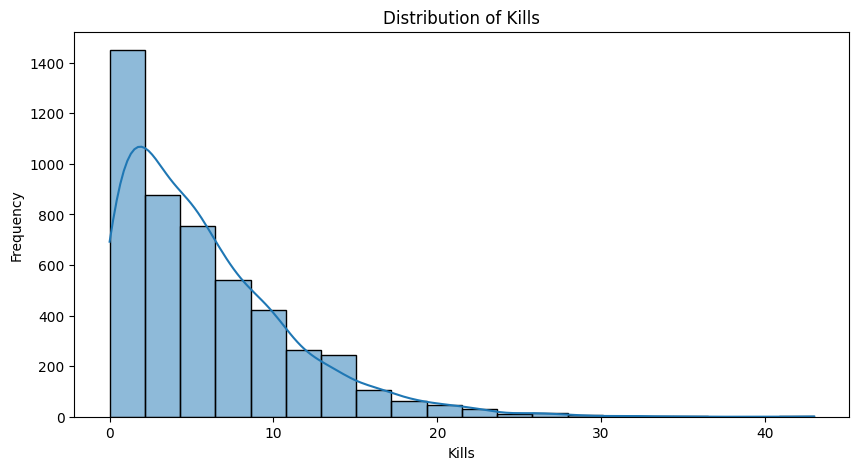

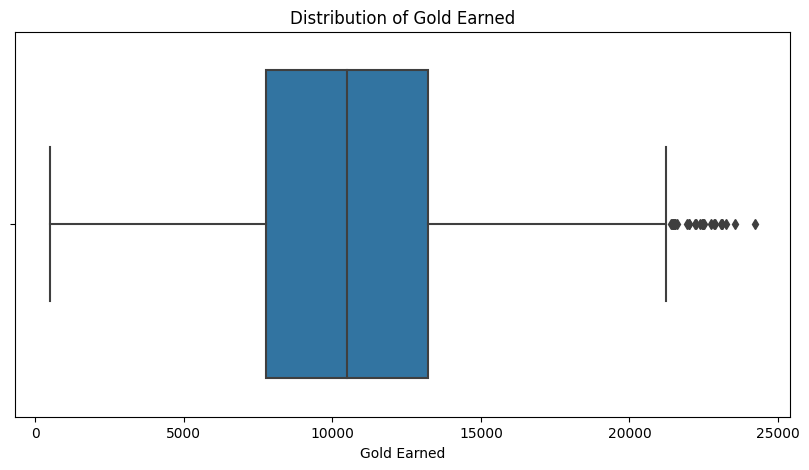

/var/folders/_n/_yykdhz173s6gl14wjfjkjxw0000gn/T/ipykernel_14924/2295443771.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['totalDamageDealt'], shade=True)


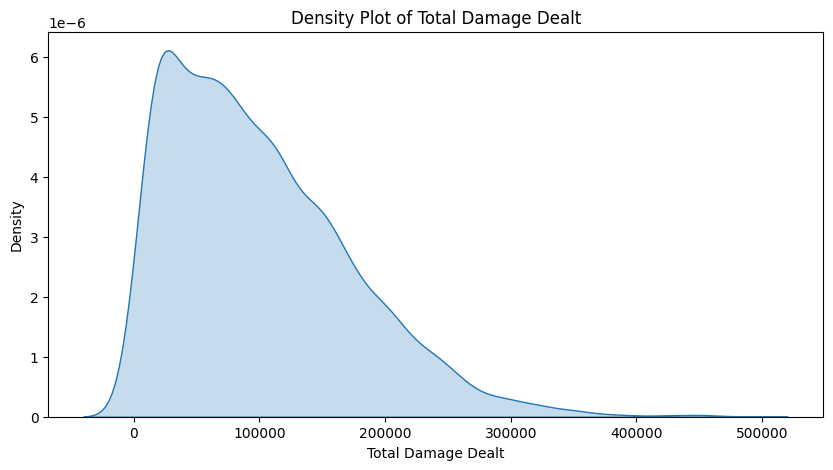

In [19]:
# Histogram for kills
plt.figure(figsize=(10, 5))
sns.histplot(df['kills'], kde=True, bins=20)
plt.title('Distribution of Kills')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()

# Box plot for goldEarned
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['goldEarned'])
plt.title('Distribution of Gold Earned')
plt.xlabel('Gold Earned')
plt.show()

# Density plot for totalDamageDealt
plt.figure(figsize=(10, 5))
sns.kdeplot(df['totalDamageDealt'], shade=True)
plt.title('Density Plot of Total Damage Dealt')
plt.xlabel('Total Damage Dealt')
plt.ylabel('Density')
plt.show()

1.2 Role Analysis:

Investigate the distribution of champions across different roles (e.g., top, jungle, mid, ADC, support).
Analyze the most popular and least popular roles.
Examine the win rates for each role and identify potential trends.

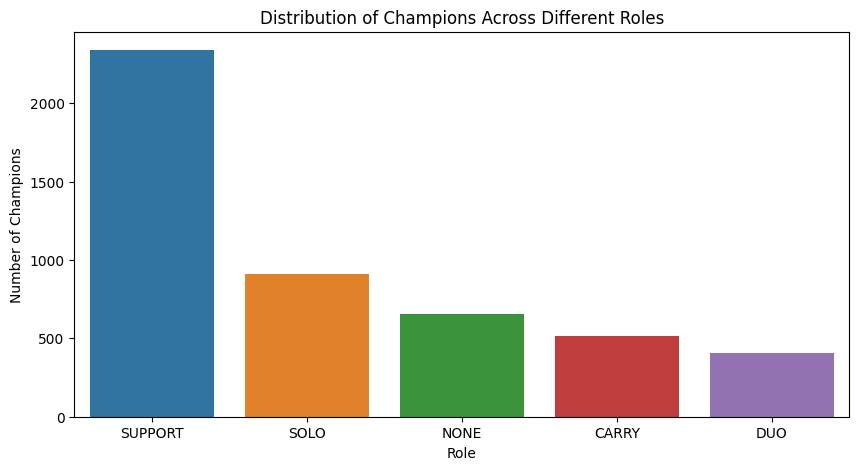

In [20]:
# Count the number of champions in each role
role_counts = df['role'].value_counts()

# Plotting the distribution of champions across roles
plt.figure(figsize=(10, 5))
sns.barplot(x=role_counts.index, y=role_counts.values)
plt.title('Distribution of Champions Across Different Roles')
plt.xlabel('Role')
plt.ylabel('Number of Champions')
plt.show()

In [21]:
# Most popular role
most_popular_role = role_counts.idxmax()
num_most_popular = role_counts.max()

# Least popular role
least_popular_role = role_counts.idxmin()
num_least_popular = role_counts.min()

print(f"The most popular role is {most_popular_role} with {num_most_popular} champions.")
print(f"The least popular role is {least_popular_role} with {num_least_popular} champions.")

The most popular role is SUPPORT with 2340 champions.
The least popular role is DUO with 404 champions.


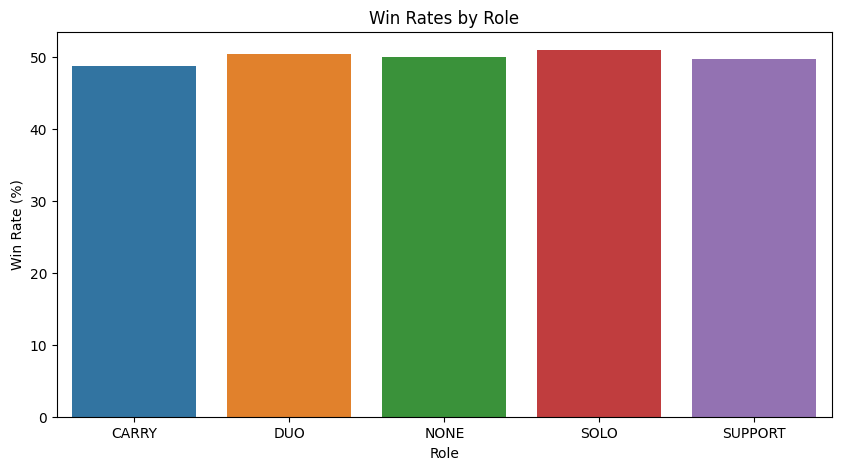

In [22]:
# Calculate the win rates for each role
win_rates = df.groupby('role')['win'].mean()

# Plotting win rates across different roles
plt.figure(figsize=(10, 5))
sns.barplot(x=win_rates.index, y=win_rates.values * 100)
plt.title('Win Rates by Role')
plt.xlabel('Role')
plt.ylabel('Win Rate (%)')
plt.show()

1.3 Win-Loss Analysis:

Calculate the overall win rate and visualize it.
Identify any differences in win rates based on specific features, such as game duration, champions, or roles.
Perform a statistical analysis (e.g., t-test) to determine if certain features significantly affect the win rate.

# Section 2: Champion Performance Analysis

2.1 Kills and Deaths:

Analyze the distribution of kills and deaths across champions.
Identify champions with high kill participation and low death rates.
Investigate the relationship between kills, deaths, and win rate.

2.2 Damage Analysis:

Study the damage dealt to objectives, turrets, buildings, and champions.
Compare physical, magical, and true damage statistics.
Explore the relationship between damage dealt and win rate.

2.3 Vision and Warding:

Examine the importance of vision in League of Legends.
Analyze the vision score, wards placed, wards killed, and vision wards bought.
Investigate the correlation between vision-related features and win rate.

# Section 3: Strategy Analysis

3.1 Objective Control:

Investigate dragon and baron kills and their impact on win rate.
Analyze inhibitors, turrets, and nexus takedowns.
Identify strategies related to objective control that lead to higher win rates.

3.2 Multi-Kills and Killing Sprees:

Study multi-kills (double, triple, quadra, penta) and their occurrence.
Analyze the relationship between killing sprees and win rate.
Investigate the impact of early game first bloods and first tower kills on the outcome.

# Conclusion

Summarize the key findings from the EDA.
Highlight interesting patterns, correlations, or strategies discovered in the dataset.
Suggest potential areas for further analysis or research.
